module 'kv_template' has no attribute 'dataset_info'
Loaded dataset with 1427 elements
loading model: /root/autodl-tmp/Qwen-1_8B


INFO:accelerate.utils.modeling:We will use 90% of the memory on device 0 for storing the model, and 10% for the buffer to avoid OOM. You can set `max_memory` in to a higher value to use more memory (at your own risk).


Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

/root/autodl-tmp/Qwen-1_8B model loaded
{'output': 'Franche-Comté', 'image': [{'image_name': 'Attribution score for output', 'image_path': '/root/interpret-lm/util/tmp/lattibnx.png', 'image_des': "The graph above represents the attribution score of the input prompt's tokens on predicting the tokens in the ground truth.", 'image_res': 'The attribution scores for the top 3 input-output pairs are: \nourse->Fran,  V->Fran,  the->Fran.'}], 'origin_data': {'Attribution': [[0.4611000119783546, 0.6628161881136959, 0.793331678911478, 1.0, 0.23395798581809366, 0.606047364838946, 0.28704705931770524, 0.884821758067343, 0.774631256433298, 0.9040315703029751, 0.524820191890913, 0.5135192961307137, 0.5156202895758772, 0.4311073720409739, 0.4078876920586137, 0.0, 0.577898118970399], [0.23200447422136847, 0.6012827875549288, 0.6042280232009954, 0.6200181296957374, 0.5239359272145476, 0.5507347224646025, 0.5314645421935569, 0.5831731464584893, 0.5525903163618204, 0.5377241052167254, 0.535661252658108, 

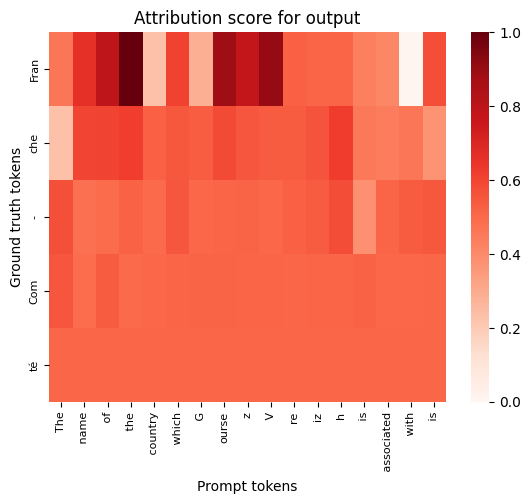

In [1]:
from diagnose import diagnose
from dataset_process import knowns, ZsRE, counterfact
from models import llama, gptj, gpt2, qwen
from methods import attribution_integrated_grads

# dataset = knowns.KnownsDataset(loc=knowns.default_loc)
# sample = knowns.get_processed_kvs(dataset[0], kn.requires_input_keys)
# dataset = ZsRE.ZsREDataset(loc=ZsRE.default_loc)
# sample = ZsRE.get_processed_kvs(dataset[0], kn.requires_input_keys)
dataset = counterfact.CounterfactDataset(loc=counterfact.default_loc)
sample = counterfact.get_processed_kvs(dataset[0], attribution_integrated_grads.requires_input_keys)
result = diagnose.diagnosing(sample=sample, model_name_or_path=qwen, method=attribution_integrated_grads.name)

print(result)

